# **A simpler algorithm**

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


price = m * crim + c

In [2]:
data.shape

(506, 14)

In [3]:
X = data[['CRIM']]
y = data['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
lm.intercept_

23.685057228193845

In [5]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.408785


y = a * x + b * x^2 + c * x^3

# **Image classification**

     |████████████████████████████████| 112kB 7.5MB/s 
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.4587 - accuracy: 0.7162
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6645 - accuracy: 0.7681
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5871 - accuracy: 0.7898
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5471 - accuracy: 0.8063
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5166 - accuracy: 0.8225
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4941 - accuracy: 0.8290
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4892 - accuracy: 0.8312
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4814 - accuracy: 0.8339
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/ste

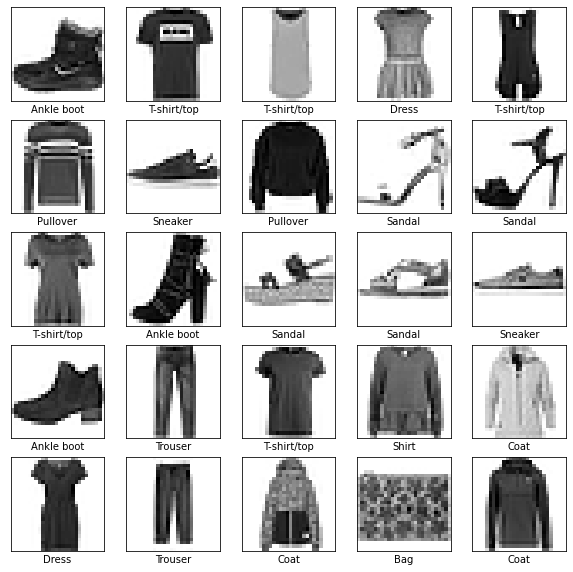

In [6]:
!pip install ipympl
!pip install tensorflow

%matplotlib inline
import ipywidgets as widgets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Print a few images**

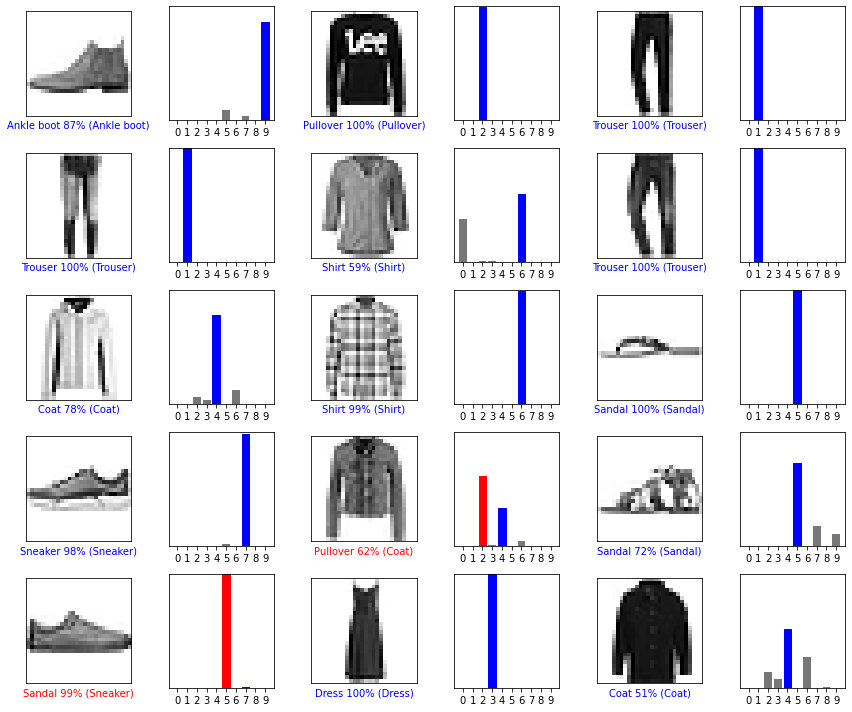

In [7]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Image predictions**

In [8]:
plt.figure(figsize=(6,3))
def plot_interactive(i):
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()
 
_ = widgets.interact(plot_interactive, i=(0, 100, 1))

<Figure size 432x216 with 0 Axes>

interactive(children=(IntSlider(value=50, description='i'), Output()), _dom_classes=('widget-interact',))